In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.layers import BatchNormalizationLayer, MaxPooling2d, ReshapeLayer,ConvolutionalLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule, RMSProp, Adam
from mlp.optimisers import Optimiser

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=False):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, test_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    """# Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')"""

    return stats, keys, run_time#, fig_1, ax_1, fig_2, ax_2


# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

#setup hyperparameters
num_epochs = 100
stats_interval = 1
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
error = CrossEntropySoftmaxError()

#default
input_dim, output_dim, hidden_dim = 784, 47, 100

model_trained = {}

model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

learning_rate = 1e-2

num_epochs = 100
rng.seed(seed)
train_data.reset()
valid_data.reset()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
# Change hidden_dim
model = MultipleLayerModel([
            ReshapeLayer(output_shape=(1,28,28)),
            ConvolutionalLayer(num_input_channels = 1,
                              num_output_channels = 5, 
                              input_dim_1=28, 
                              input_dim_2=28,
                              kernel_dim_1=5,
                              kernel_dim_2=5),   
            MaxPooling2d(5,(24,24)),
            ConvolutionalLayer(num_input_channels = 5,
                              num_output_channels = 10, 
                              input_dim_1=12, 
                              input_dim_2=12,
                              kernel_dim_1=5,
                              kernel_dim_2=5),
            MaxPooling2d(10,(8,8)),  
            ReshapeLayer(),
            AffineLayer(160, output_dim, weights_init, biases_init)])
        
model_trained = train_model_and_plot_stats(
            model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True)
np.save('conv2layertest', model_trained)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


KeyboardInterrupt: 

In [3]:
np.save('CNN_2_test', model_trained)

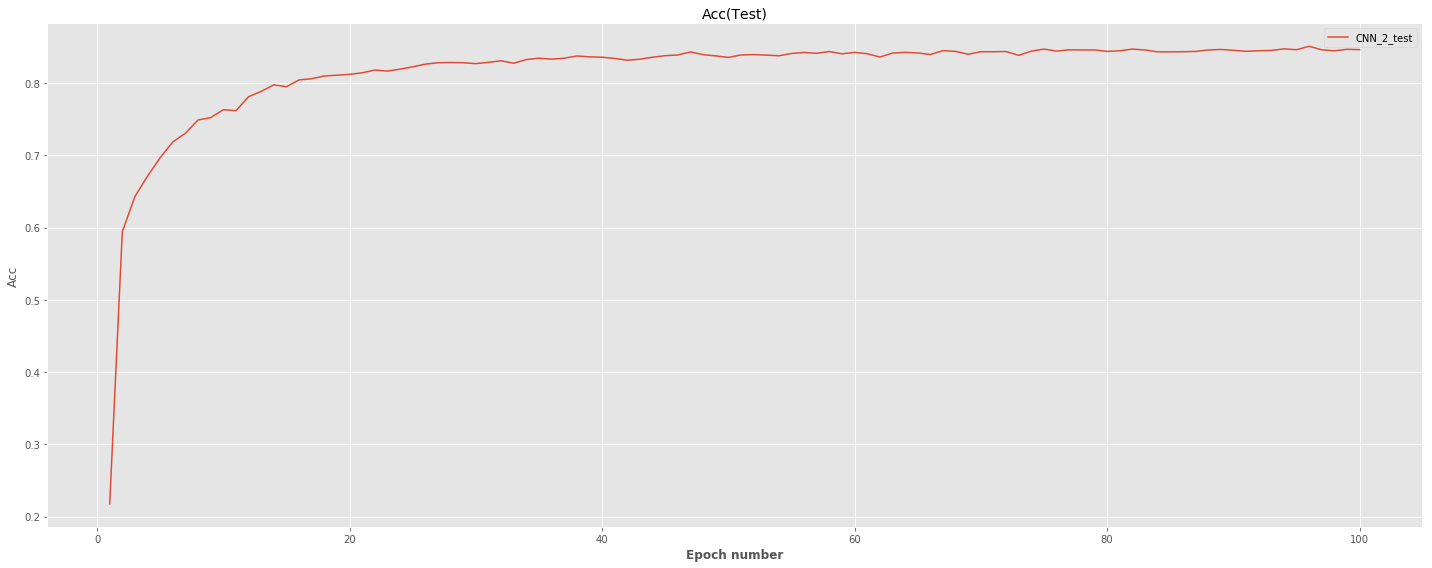

In [19]:
CNN_2_test = np.load('CNN_2_test.npy')
model = CNN_2_test
models_name = ['CNN_2_test']
fig_1 = plt.figure(figsize=(20, 8))
ax_1 = fig_1.add_subplot(111)
for k in ['acc(valid)']:
        stats = model[0]
        keys = model[1]
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
ax_1.legend(models_name,loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Acc', fontsize = 12)
ax_1.set_title('Acc(Test)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('CNN_2_test_acc.pdf')

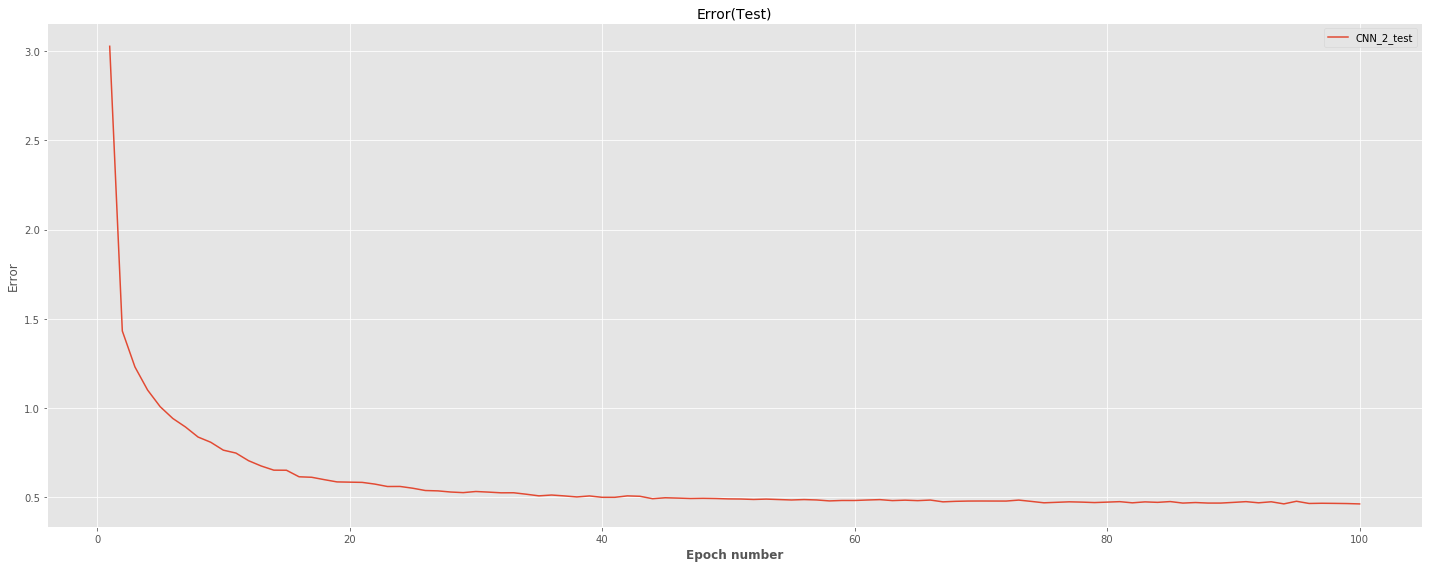

In [18]:
CNN_2_test = np.load('CNN_2_test.npy')
model = CNN_2_test
models_name = ['CNN_2_test']
fig_1 = plt.figure(figsize=(20, 8))
ax_1 = fig_1.add_subplot(111)
for k in ['error(valid)']:
        stats = model[0]
        keys = model[1]
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
ax_1.legend(models_name,loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12)
ax_1.set_title('Error(Test)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('CNN_2_teserror.pdf')

In [3]:
CNN_1 = np.load('CNN_1.npy')
CNN_2 = np.load('CNN_2.npy')
models = [CNN_1, CNN_2]
models_name = ['CNN_1', 'CNN_2']
fig_1 = plt.figure(figsize=(20, 8))
ax_1 = fig_1.add_subplot(111)
for model in models:
    for k in ['acc(valid)']:
        stats = model[0]
        keys = model[1]
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
ax_1.legend(models_name,loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Acc', fontsize = 12)
ax_1.set_title('Acc(Valid)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('CNN_ACC.pdf')

In [4]:
CNN_1 = np.load('CNN_1.npy')
CNN_2 = np.load('CNN_2.npy')
models = [CNN_1, CNN_2]
models_name = ['CNN_1', 'CNN_2']
fig_1 = plt.figure(figsize=(20, 8))
ax_1 = fig_1.add_subplot(111)
for model in models:
    for k in ['error(valid)']:
        stats = model[0]
        keys = model[1]
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
ax_1.legend(models_name,loc=0)
ax_1.set_xlabel('Epoch number',fontsize = 12, fontweight = 1000)
ax_1.set_ylabel('Error', fontsize = 12)
ax_1.set_title('Error(Valid)', fontsize = 14)
plt.tight_layout()
fig_1.savefig('CNN_Error.pdf')